Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Model for 1st target variable

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("global_power_plant.csv")
df.head(10)

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   
5     IND        India              AKRIMOTA LIG  IND0000003        250.0   
6     IND        India                    ALIYAR  IND0000004         60.0   
7     IND        India           ALLAIN DUHANGAN  IND0000005        192.0   
8     IND        India               ALMATTI DAM  IND0000006        290.0   
9     IND        India               AMAR KANTAK  IND0000007        210.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   
5   23.7689    68.6447         Coal         Oil         NaN  ...   
6   10.4547    77.0078        Hydro         NaN         NaN  ...   
7   32.2258    77.2070        Hydro         NaN         NaN  ...   
8   16.3300    75.8863        Hydro         NaN         NaN  ...   
9   23.1642    81.6373         Coal         Oil         NaN  ...   

                     geolocation_source  wepp_id year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                   NaN   
1                                   WRI      NaN                   NaN   
2                                   WRI      NaN                   NaN   
3                                   WRI      NaN                2018.0   
4                                   WRI      NaN                2018.0   
5                                   WRI      NaN                2018.0   
6                                   WRI      NaN                2018.0   
7                                   WRI      NaN                2018.0   
8                                   WRI      NaN                2018.0   
9                                   WRI      NaN                2018.0   

  generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3          631.777928          617.789264            843.7470   
4         1668.290000         3035.550000           5916.3700   
5          821.798000         1153.421000           1208.8520   
6          147.568450          157.558250            152.1952   
7          696.738800          674.391100            721.3352   
8          504.813250          480.594950            144.4342   
9         2642.322000         1887.904000           1643.0460   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           886.004428           663.774500  Central Electricity Authority   
4          6243.000000          5385.579736  Central Electricity Authority   
5          1175.765000          1147.913000  Central Electricity Authority   
6            61.421350            89.629600  Central Electricity Authority   
7           675.724400           679.594950  Central Electricity Authority   
8           402.029750           439.372100  Central Electricity Authority   
9          1338.093000          1563.457000  Central Electricity Authority   

   estimated_ge

load the top 10 database

In [3]:
df.tail(10)

country country_long                                               name  \
898     IND        India  Wind power project by Riddhi Siddhi Gluco Biol...   
899     IND        India                    Wind power project in Rajasthan   
900     IND        India                                    YAMUNANAGAR TPP   
901     IND        India                                 YASHWANTRAO MOHITE   
902     IND        India                                      YELHANKA (DG)   
903     IND        India                                       YERMARUS TPP   
904     IND        India                       Yelesandra Solar Power Plant   
905     IND        India                       Yelisirur wind power project   
906     IND        India                                        ZAWAR MINES   
907     IND        India                            iEnergy Theni Wind Farm   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
898  WRI1026753        34.65    8.8709    77.4466         Wind         NaN   
899  WRI1026769        42.00   27.1715    70.6877         Wind         NaN   
900  IND0000511       600.00   30.1081    77.3257         Coal         Oil   
901  WRI1019995        16.00   17.1653    74.2456      Biomass         NaN   
902  IND0000512       106.60   13.1156    77.5838          Oil         NaN   
903  IND0000513      1600.00   16.2949    77.3568         Coal         Oil   
904  WRI1026222         3.00   12.8932    78.1654        Solar         NaN   
905  WRI1026776        25.50   15.2758    75.5811         Wind         NaN   
906  WRI1019901        80.00   24.3500    73.7477         Coal         NaN   
907  WRI1026761        16.50    9.9344    77.4768         Wind         NaN   

    other_fuel2  ...  geolocation_source  wepp_id year_of_capacity_data  \
898         NaN  ...                 WRI      NaN                   NaN   
899         NaN  ...                 WRI      NaN                   NaN   
900         NaN  ...                 WRI      NaN                2018.0   
901         NaN  ...                 WRI      NaN                   NaN   
902         NaN  ...                 WRI      NaN                2018.0   
903         NaN  ...                 WRI      NaN                2018.0   
904         NaN  ...      Industry About      NaN                   NaN   
905         NaN  ...                 WRI      NaN                   NaN   
906         NaN  ...                 WRI      NaN                   NaN   
907         NaN  ...                 WRI      NaN                   NaN   

    generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
898                 NaN                 NaN                 NaN   
899                 NaN                 NaN                 NaN   
900            3158.016          3194.35982         3709.552200   
901                 NaN                 NaN                 NaN   
902              20.900             0.00000            0.000000   
903                 NaN                 NaN            0.994875   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   
907                 NaN                 NaN                 NaN   

     generation_gwh_2016  generation_gwh_2017         generation_data_source  \
898                  NaN                  NaN                            NaN   
899                  NaN                  NaN                            NaN   
900          3123.572061          3156.053669  Central Electricity Authority   
901                  NaN                  NaN                            NaN   
902             0.000000                  NaN  Central Electricity Authority   
903           233.596650           865.400000  Central Electricity Authority   
904                  NaN                  NaN                            NaN   
905                  NaN                  NaN                          

show the last 10 data sets .

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

above is the list of all columns.

In [5]:
df.shape

(908, 25)

our datasets has 908 rows and 25 columns

In [6]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Our dataset contains obejct and integer both type of data.

In [7]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

We can see, we have null values in some of the columns. Let's see the same thing with help of heatmap:

<AxesSubplot:>

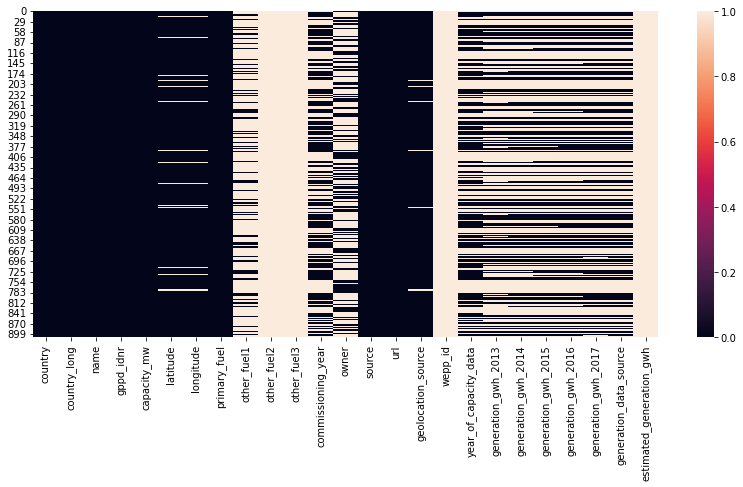

In [8]:
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull())

Before fill the null values ahead lets dropping the columns we dont needed:

In [9]:
df = df.drop('country', axis =1)
df = df.drop('country_long', axis =1)
df = df.drop('other_fuel2', axis = 1) #above 80% missing values
df = df.drop('other_fuel3', axis = 1) #above 80% missing values
df = df.drop('other_fuel1', axis = 1) #above 80# missing values
df = df.drop('wepp_id', axis =1)
df = df.drop('estimated_generation_gwh', axis =1)
df = df.drop('url', axis = 1)
df = df.drop('geolocation_source', axis=1)

lets treatment missing values:

In [10]:
#Lets replace missing value for numeric columns
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean(), inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(), inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(), inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(), inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(), inplace=True)

In [11]:
#Checking Median

df['commissioning_year'].median()

2000.0

In [12]:
#Replacing the Nan values with the median

df["commissioning_year"]=df["commissioning_year"].fillna(np.mean(df["commissioning_year"]))

In [13]:
#Checking the median of the column

df['latitude'].median()

21.7783

In [14]:
#Replacing the value with media

df["latitude"]=df["latitude"].fillna(np.mean(df["latitude"]))

In [15]:
#Checking median

df['longitude'].median()

76.71924999999999

In [16]:
#Filling the Nan value with the median

df["longitude"]=df["longitude"].fillna(np.mean(df["longitude"]))

In [17]:
df.nunique()

name                      908
gppd_idnr                 908
capacity_mw               365
latitude                  838
longitude                 829
primary_fuel                8
commissioning_year         74
owner                     280
source                    191
year_of_capacity_data       1
generation_gwh_2013       365
generation_gwh_2014       375
generation_gwh_2015       399
generation_gwh_2016       406
generation_gwh_2017       411
generation_data_source      1
dtype: int64

from above description we are getting one unique values which is year_of_capacity_data and generation_data_source in our data set. we need to drom these columns

In [18]:
#one unique value present thatsy drop these two columns
df = df.drop('year_of_capacity_data', axis=1)
df = df.drop('generation_data_source', axis=1)

In [19]:
nom_col=[]
for i in df:
    if df.dtypes[i] == object:
        nom_col.append(i)
        
print(nom_col)

['name', 'gppd_idnr', 'primary_fuel', 'owner', 'source']


above list of columns which as datasets as objects

# Let's do Visualization:

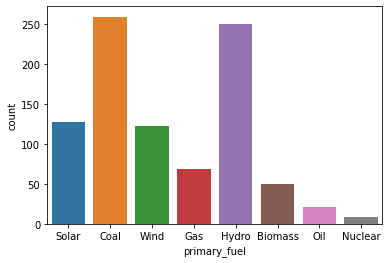

In [20]:
plt.figure()
sns.countplot(df["primary_fuel"])
plt.show()

in above figure coal is the higher quantity of fuel in the world and nuclear is the lower quantity of the fuel.also it is my target column

and these are less quantity of fuel

<AxesSubplot:xlabel='capacity_mw'>

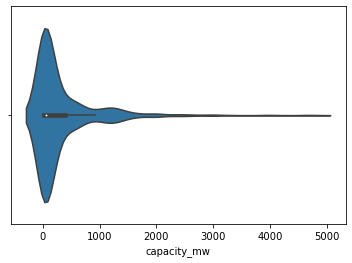

In [21]:
#We can clearly see that the plot is more concentrated towards 1.0 to 100

sns.violinplot(df['capacity_mw'])

# Let's do Encoding:

In [22]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

variables = ['name', 'gppd_idnr', 'primary_fuel', 'owner', 'source']
for v in variables:
    df[v] = label.fit_transform(df[v])

In [23]:
df

name  gppd_idnr  capacity_mw  latitude  longitude  primary_fuel  \
0       0        658          2.5   28.1839    73.2407             6   
1       1        520         98.0   24.7663    74.6090             1   
2       2        854         39.2   21.9038    69.3732             7   
3       3          0        135.0   23.8712    91.3602             2   
4       4          1       1800.0   21.9603    82.4091             1   
..    ...        ...          ...       ...        ...           ...   
903   903        494       1600.0   16.2949    77.3568             1   
904   904        823          3.0   12.8932    78.1654             6   
905   905        892         25.5   15.2758    75.5811             7   
906   906        540         80.0   24.3500    73.7477             1   
907   907        877         16.5    9.9344    77.4768             7   

     commissioning_year  owner  source  generation_gwh_2013  \
0           2011.000000    229     109          2304.059202   
1           1996.876894    258     174          2304.059202   
2           1996.876894      2      21          2304.059202   
3           2004.000000    280      22           631.777928   
4           2015.000000    280      22          1668.290000   
..                  ...    ...     ...                  ...   
903         2016.000000    280      22          2304.059202   
904         1996.876894    114      77          2304.059202   
905         1996.876894    280      21          2304.059202   
906         1996.876894     91      59          2304.059202   
907         1996.876894    279      21          2304.059202   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            2420.393316          2414.072373          2453.936292   
1            2420.393316          2414.072373          2453.936292   
2            2420.393316          2414.072373          2453.936292   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
903          2420.393316             0.994875           233.596650   
904          2420.393316          2414.072373          2453.936292   
905          2420.393316          2414.072373          2453.936292   
906          2420.393316          2414.072373          2453.936292   
907          2420.393316          2414.072373          2453.936292   

     generation_gwh_2017  
0            2531.754458  
1            2531.754458  
2            2531.754458  
3             663.774500  
4            5385.579736  
..                   ...  
903           865.400000  
904          2531.754458  
905          2531.754458  
906          2531.754458  
907          2531.754458  

[908 rows x 14 columns]

now we can see that we have not any categorical data types

# Let's Describe our datasets:

In [24]:
df.describe()

name  gppd_idnr  capacity_mw    latitude   longitude  \
count  908.00000  908.00000   908.000000  908.000000  908.000000   
mean   453.50000  453.50000   321.046378   21.196189   77.447848   
std    262.26132  262.26132   580.221767    6.088110    4.781201   
min      0.00000    0.00000     0.000000    8.168900   68.644700   
25%    226.75000  226.75000    16.837500   17.057825   74.390250   
50%    453.50000  453.50000    60.000000   21.278850   76.978950   
75%    680.25000  680.25000   388.125000   25.183775   79.211600   
max    907.00000  907.00000  4760.000000   34.649000   95.408000   

       primary_fuel  commissioning_year       owner      source  \
count    908.000000          908.000000  908.000000  908.000000   
mean       3.205947         1996.876894  227.534141   43.823789   
std        2.281339           12.994825   83.895877   44.624092   
min        0.000000         1927.000000    0.000000    0.000000   
25%        1.000000         1996.876894  188.750000   22.000000   
50%        3.000000         1996.876894  280.000000   22.000000   
75%        6.000000         2003.000000  280.000000   29.250000   
max        7.000000         2018.000000  280.000000  190.000000   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
count           908.000000           908.000000           908.000000   
mean           2304.059202          2420.393316          2414.072373   
std            2465.930970          2665.360236          2860.146282   
min               0.000000             0.000000             0.000000   
25%            1332.538825          1175.264825           874.205000   
50%            2304.059202          2420.393316          2414.072373   
75%            2304.059202          2420.393316          2414.072373   
max           27586.200000         28127.000000         30539.000000   

       generation_gwh_2016  generation_gwh_2017  
count           908.000000           908.000000  
mean           2453.936292          2531.754458  
std            2878.730064          2923.041411  
min               0.000000             0.000000  
25%             826.629750           852.438887  
50%            2453.936292          2531.754458  
75%            2453.936292          2531.754458  
max           30015.000000         35116.000000

there is a large difference between 75% and maximum for some columns.so outliers are present in this dataset.lets see its with visualization.

<AxesSubplot:>

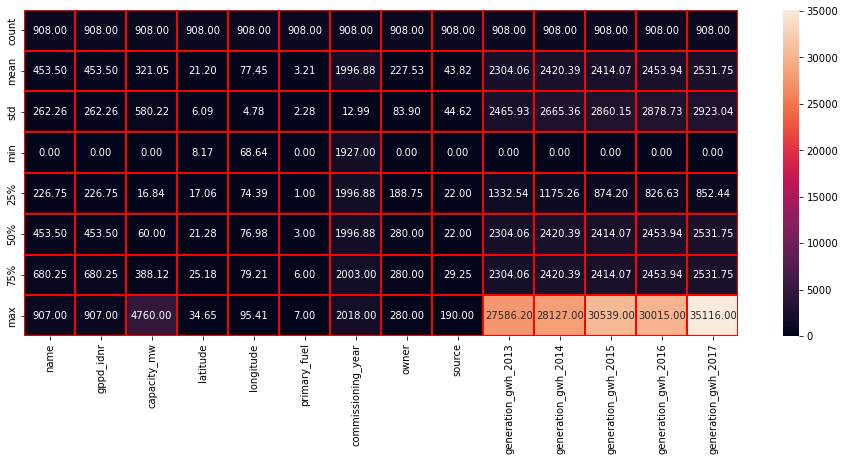

In [25]:
plt.figure(figsize=(16,6))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f")

# Correlation of the columns with target columns:

In [26]:
df.corr()

name  gppd_idnr  capacity_mw  latitude  longitude  \
name                 1.000000   0.336792     0.059870 -0.133707   0.018649   
gppd_idnr            0.336792   1.000000    -0.334308 -0.105932  -0.380290   
capacity_mw          0.059870  -0.334308     1.000000  0.049790   0.197124   
latitude            -0.133707  -0.105932     0.049790  1.000000   0.031501   
longitude            0.018649  -0.380290     0.197124  0.031501   1.000000   
primary_fuel         0.038752   0.607373    -0.377783 -0.013453  -0.348710   
commissioning_year  -0.041884   0.041601     0.265827  0.095050   0.086054   
owner                0.116715  -0.602108     0.303672  0.007033   0.277888   
source              -0.013801   0.416575    -0.241701  0.055943  -0.239008   
generation_gwh_2013  0.082699   0.044187     0.667842  0.036639   0.014021   
generation_gwh_2014  0.084915   0.045391     0.705434  0.044085   0.011669   
generation_gwh_2015  0.075140   0.039965     0.722081  0.036127   0.019176   
generation_gwh_2016  0.067800   0.027947     0.752829  0.030932   0.039758   
generation_gwh_2017  0.075262   0.024079     0.767040  0.030655   0.040407   

                     primary_fuel  commissioning_year         owner  \
name                     0.038752           -0.041884  1.167146e-01   
gppd_idnr                0.607373            0.041601 -6.021076e-01   
capacity_mw             -0.377783            0.265827  3.036718e-01   
latitude                -0.013453            0.095050  7.033301e-03   
longitude               -0.348710            0.086054  2.778876e-01   
primary_fuel             1.000000           -0.123060 -2.601736e-01   
commissioning_year      -0.123060            1.000000 -2.166954e-02   
owner                   -0.260174           -0.021670  1.000000e+00   
source                   0.053609            0.021832 -2.438403e-01   
generation_gwh_2013     -0.120512            0.110848  1.506199e-16   
generation_gwh_2014     -0.125000            0.134305 -1.018477e-16   
generation_gwh_2015     -0.125138            0.149304  1.267618e-16   
generation_gwh_2016     -0.131358            0.172698  9.361248e-17   
generation_gwh_2017     -0.132174            0.173400  1.751317e-16   

                           source  generation_gwh_2013  generation_gwh_2014  \
name                -1.380057e-02         8.269905e-02         8.491457e-02   
gppd_idnr            4.165747e-01         4.418679e-02         4.539080e-02   
capacity_mw         -2.417009e-01         6.678419e-01         7.054341e-01   
latitude             5.594280e-02         3.663949e-02         4.408464e-02   
longitude           -2.390075e-01         1.402097e-02         1.166872e-02   
primary_fuel         5.360860e-02        -1.205116e-01        -1.249997e-01   
commissioning_year   2.183213e-02         1.108482e-01         1.343054e-01   
owner               -2.438403e-01         1.506199e-16        -1.018477e-16   
source               1.000000e+00         3.108486e-17         3.524754e-17   
generation_gwh_2013  3.108486e-17         1.000000e+00         9.634535e-01   
generation_gwh_2014  3.524754e-17         9.634535e-01         1.000000e+00   
generation_gwh_2015 -8.212982e-18         8.963761e-01         9.537116e-01   
generation_gwh_2016 -5.204877e-17         8.735420e-01         9.260100e-01   
generation_gwh_2017 -1.050936e-16         8.306385e-01         8.918721e-01   

                     generation_gwh_2015  generation_gwh_2016  \
name                        7.514018e-02         6.780015e-02   
gppd_idnr                   3.996483e-02         2.794672e-02   
capacity_mw                 7.220814e-01         7.528288e-01   
latitude                    3.612730e-02         3.093239e-02   
longitude                   1.917647e-02         3.975774e-02   
primary_fuel               -1.251376e-01        -1.313584e-01   
commissioning_year          1.493040e-01         1.726976e-01   
owner                       1.267618e-16         9.361248e-17   
source           

lets see its with visualization

<AxesSubplot:>

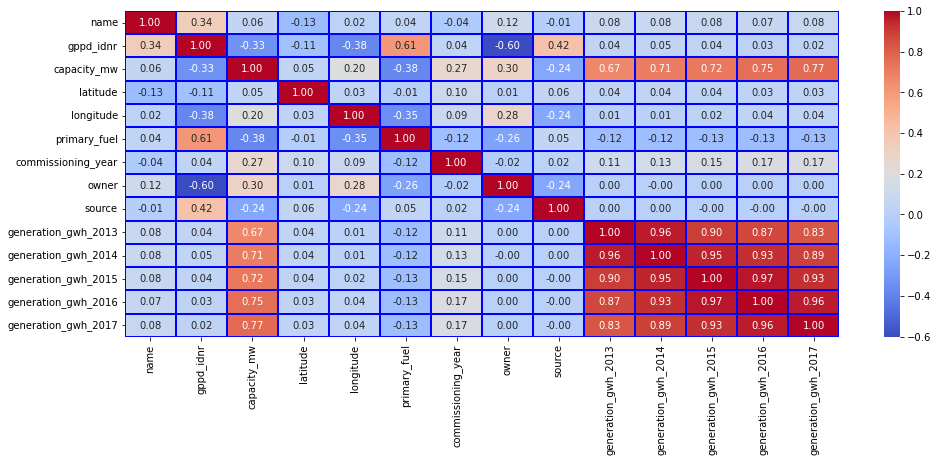

In [27]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="blue",fmt="0.2f",cmap="coolwarm")

Checking the columns which are positively and negative correlated with the target columns:

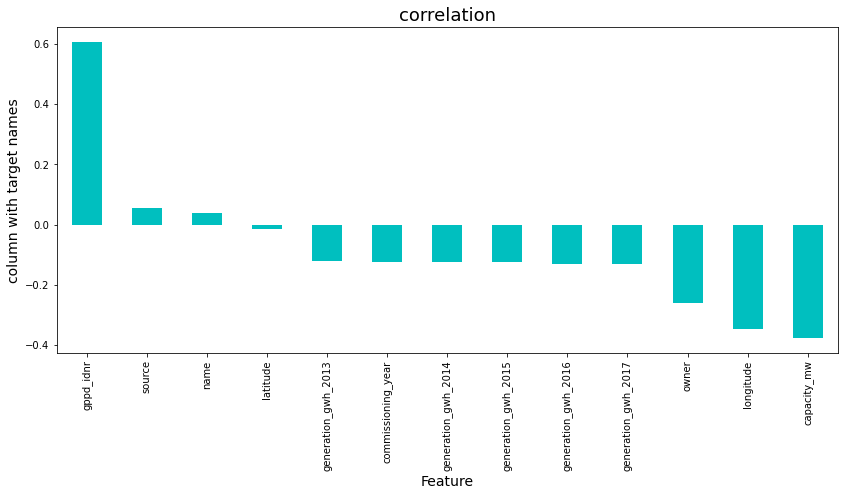

In [28]:
plt.figure(figsize=(14,6))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

there are maximum columns are negative correlation with the target columns

<Figure size 1440x720 with 0 Axes>

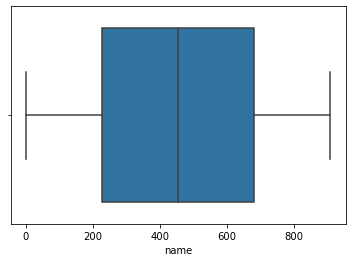

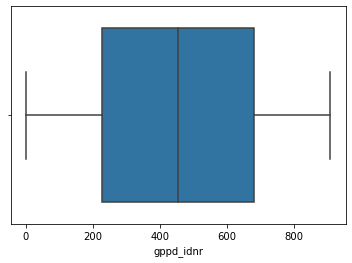

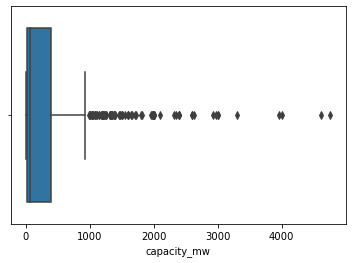

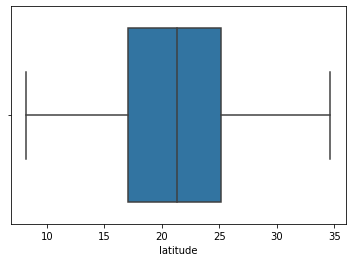

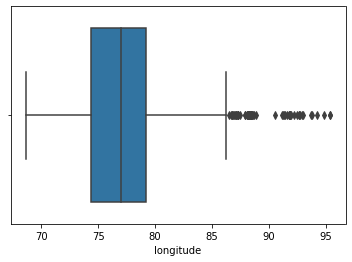

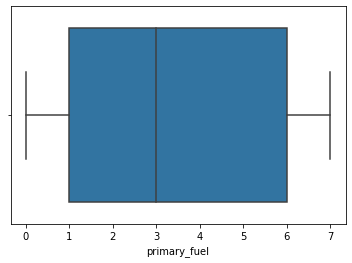

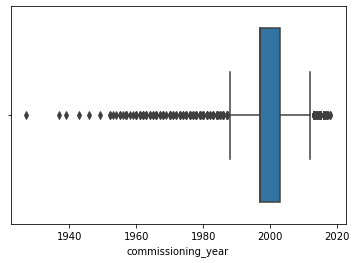

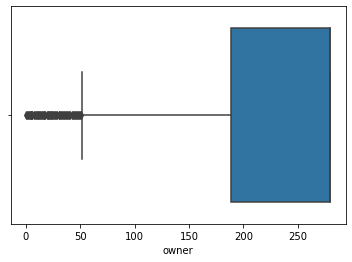

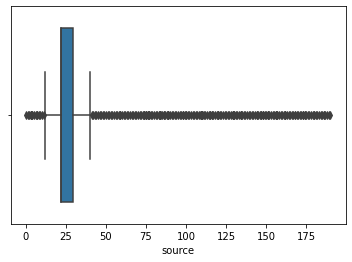

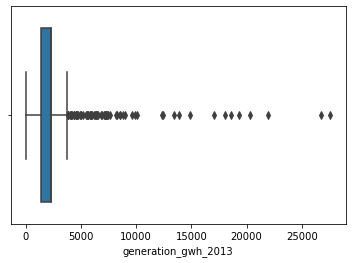

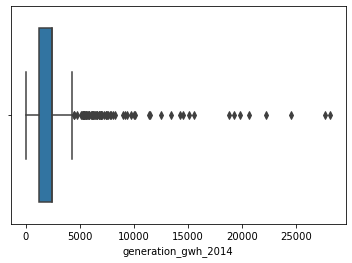

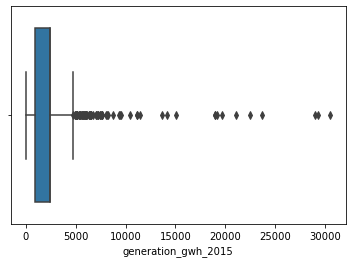

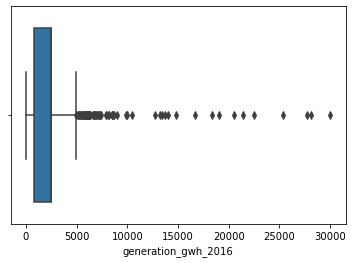

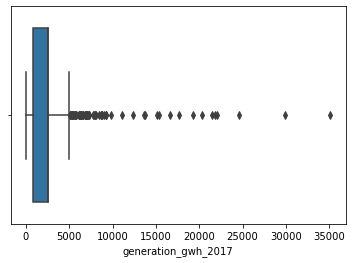

In [29]:
plt.figure(figsize=(20,10))
for i in df.columns:
    plt.figure()
    sns.boxplot(x=df[i])

outliers are present in our datasets. need to remove it.

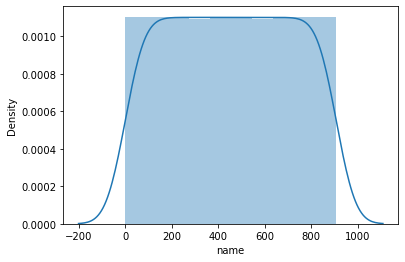

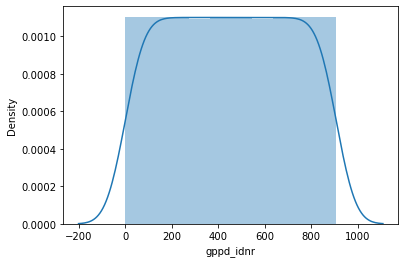

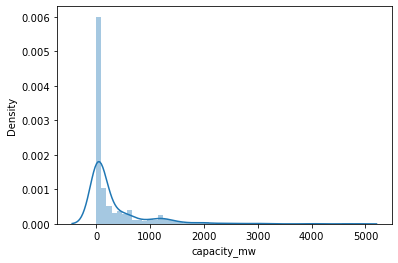

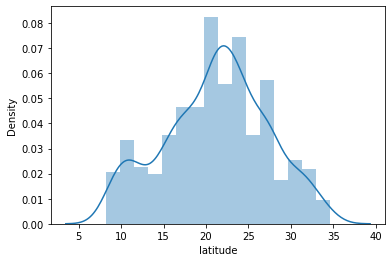

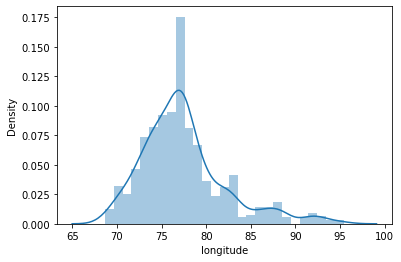

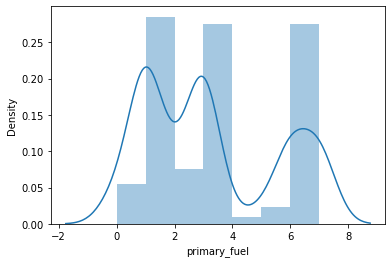

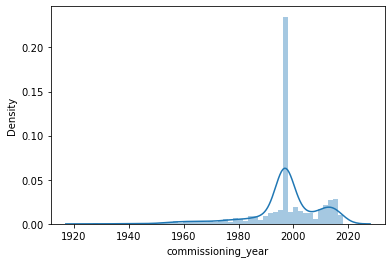

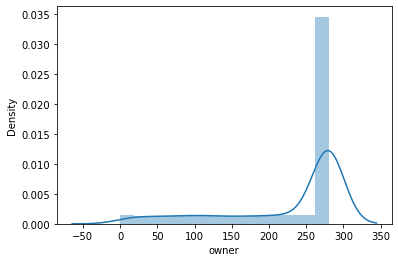

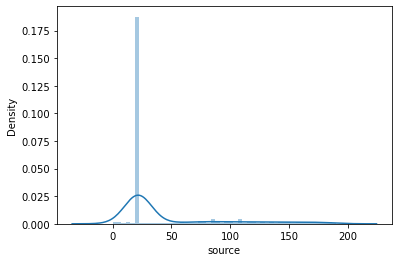

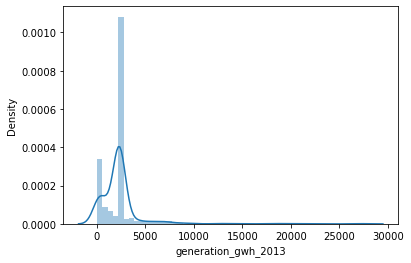

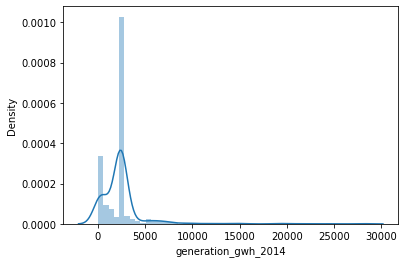

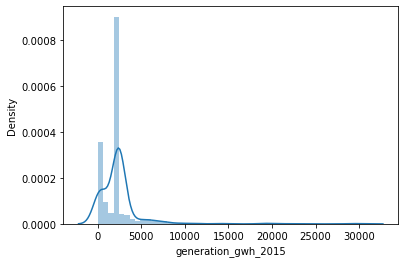

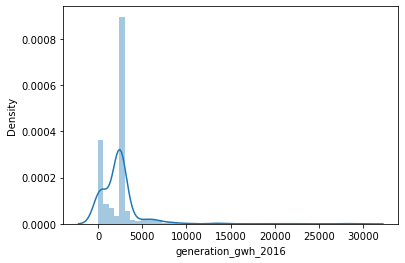

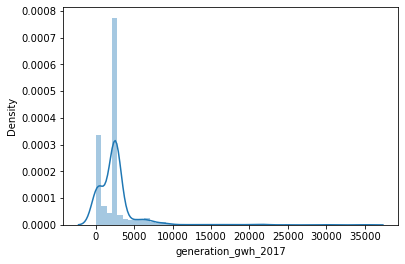

In [30]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i],kde=True)

We can see distribution is uneven in many columns

In [31]:
#skewness check
df.skew()

name                   0.000000
gppd_idnr              0.000000
capacity_mw            3.193257
latitude              -0.147391
longitude              1.129836
primary_fuel           0.471141
commissioning_year    -1.383330
owner                 -1.375607
source                 1.829145
generation_gwh_2013    5.241491
generation_gwh_2014    5.041961
generation_gwh_2015    5.367370
generation_gwh_2016    5.071758
generation_gwh_2017    5.111938
dtype: float64

skewness are present in our datasets. need to remove it.

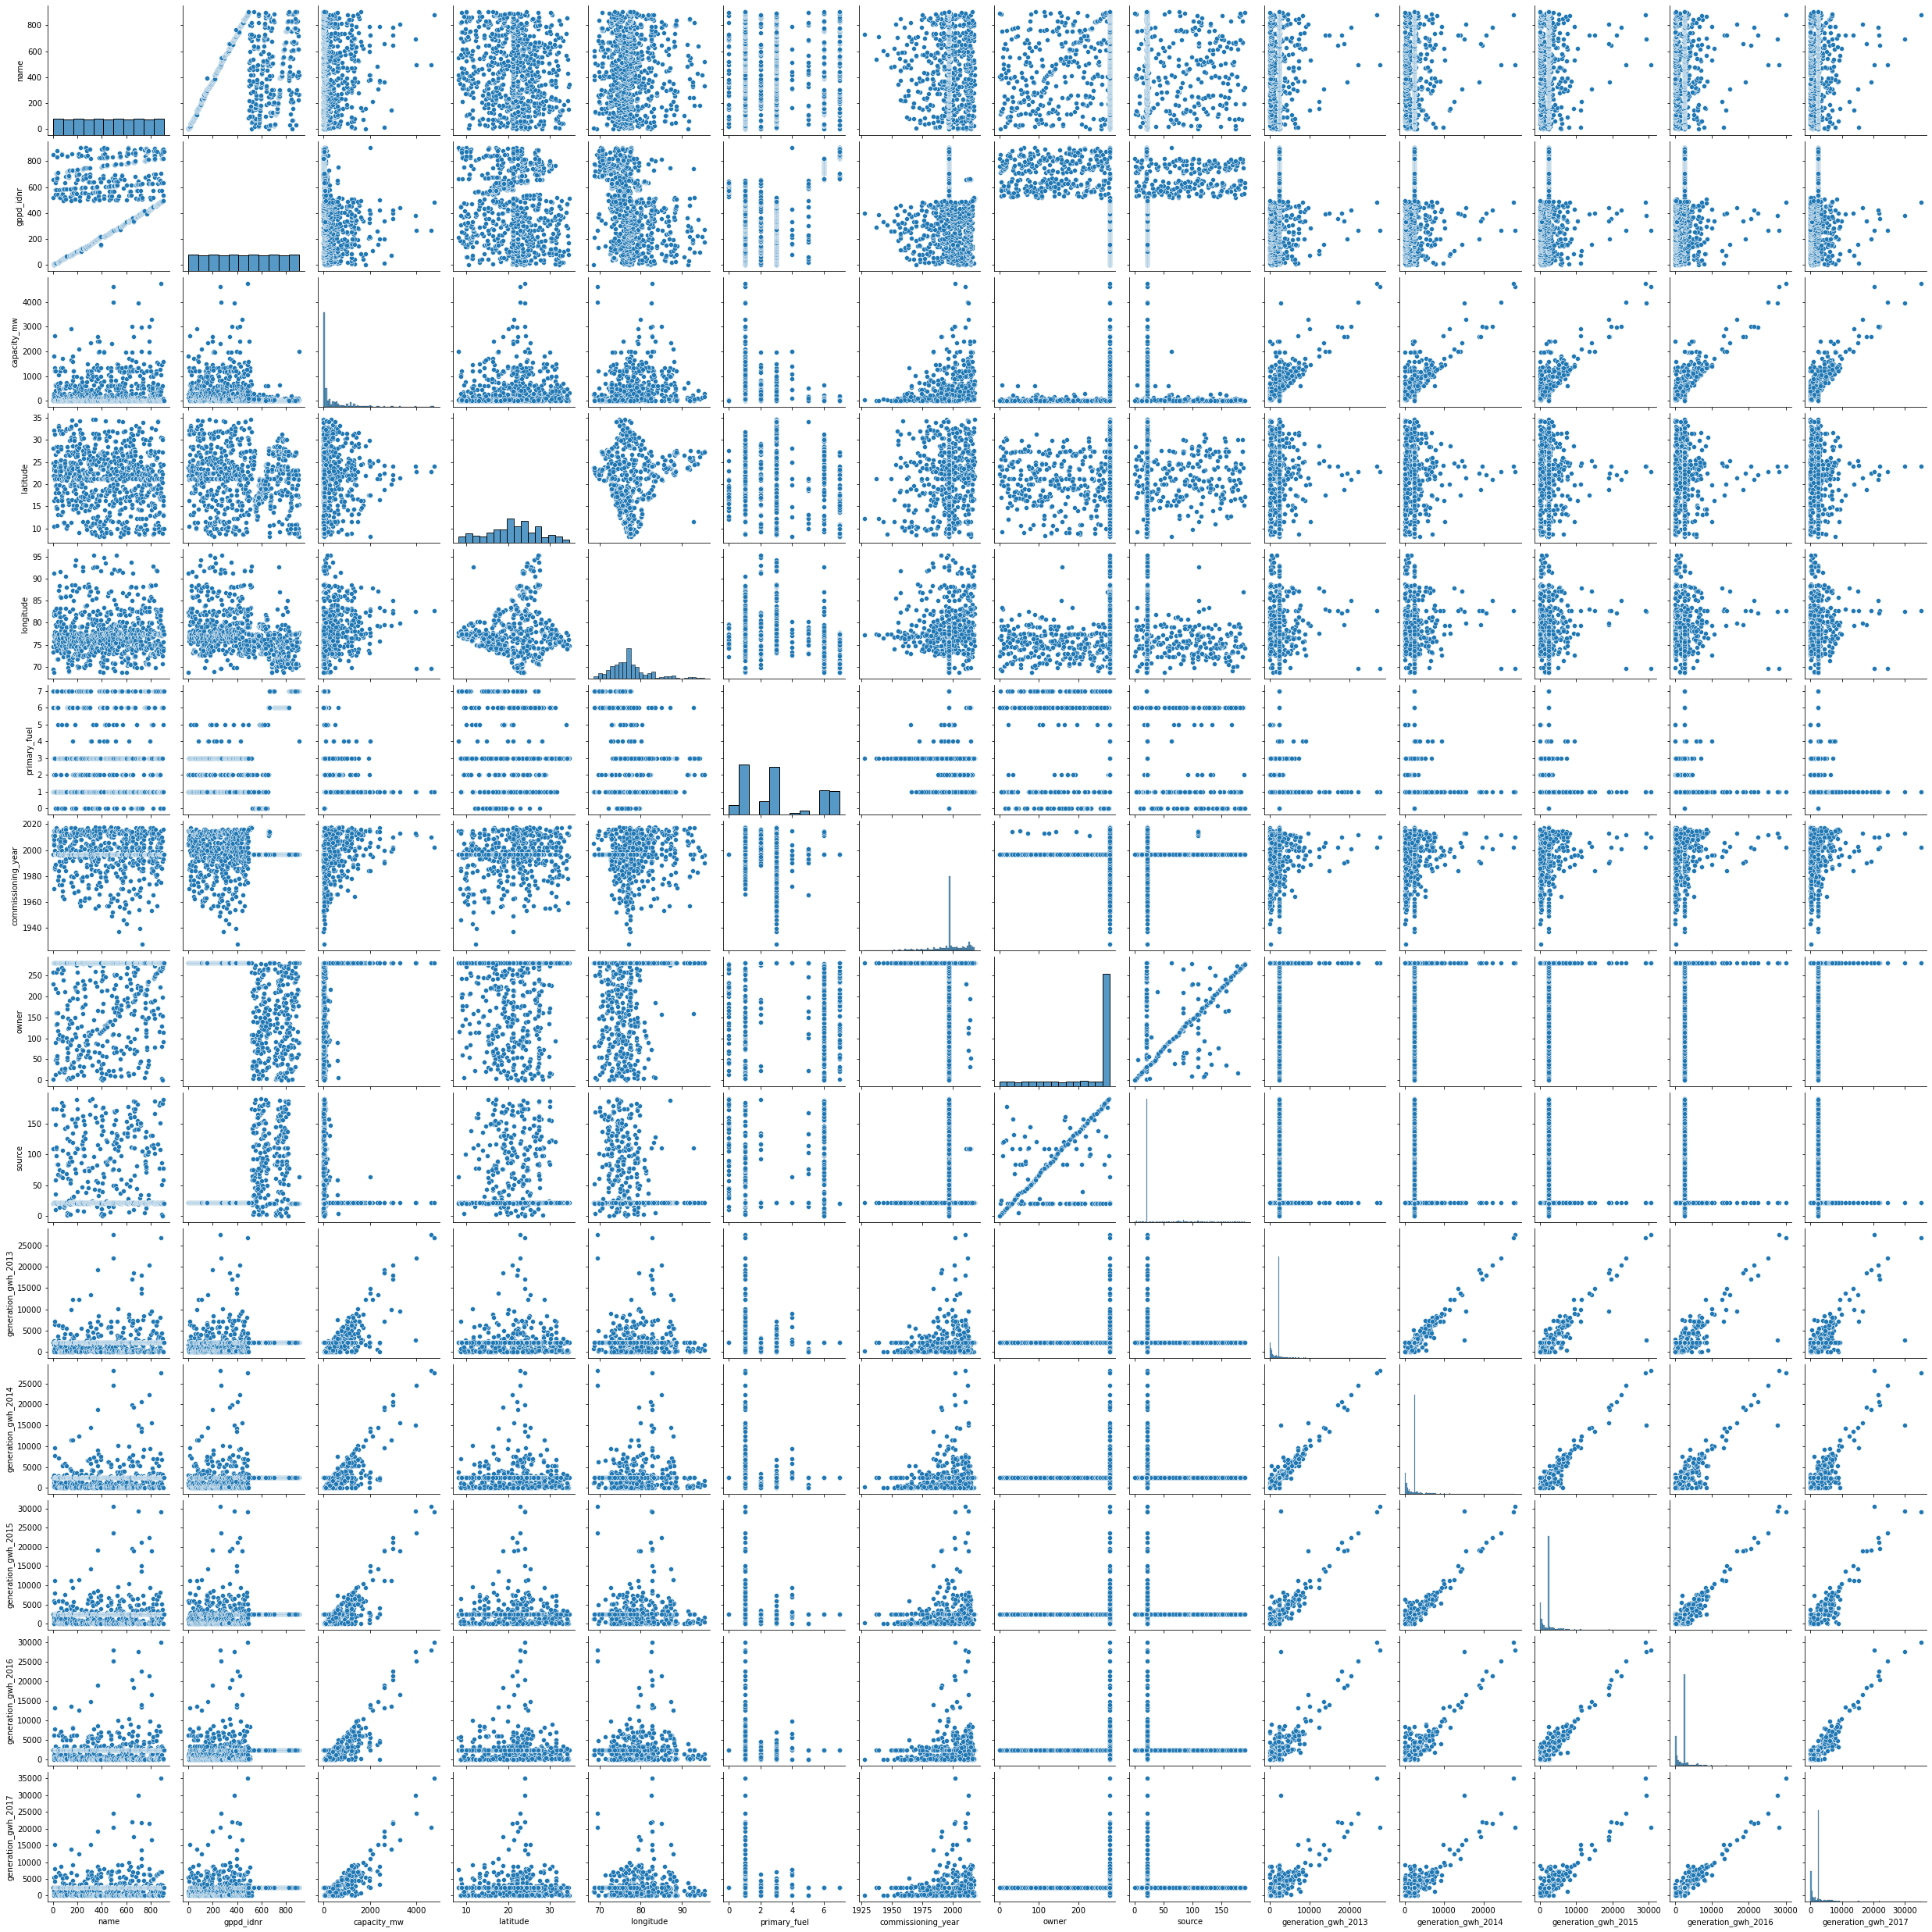

In [32]:
sns.pairplot(df)

Above pairplot shows that relation between each and every column of our dataset.

# Skewness and outliers removal:

In [33]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 15,  15,  15,  15,  72,  81, 144, 144, 144, 144, 144, 144, 159,
        159, 180, 184, 192, 210, 210, 210, 210, 210, 210, 222, 240, 245,
        300, 309, 309, 309, 309, 309, 309, 322, 324, 334, 341, 343, 346,
        361, 364, 365, 365, 365, 365, 365, 365, 372, 376, 389, 417, 428,
        445, 455, 479, 483, 485, 494, 494, 494, 494, 494, 494, 495, 495,
        495, 495, 495, 495, 500, 520, 530, 533, 539, 542, 547, 575, 584,
        602, 622, 639, 649, 649, 649, 649, 649, 649, 658, 658, 658, 658,
        658, 658, 662, 670, 690, 696, 696, 696, 696, 696, 707, 710, 722,
        722, 722, 722, 725, 725, 725, 725, 725, 727, 727, 727, 727, 727,
        727, 729, 787, 787, 787, 787, 787, 787, 789, 808, 809, 809, 809,
        809, 809, 819, 833, 848, 849, 849, 871, 872, 880, 881, 881, 881,
        881, 881, 881, 896, 901], dtype=int64),
 array([ 2, 11, 12, 13,  8,  8,  2,  9, 10, 11, 12, 13,  9, 10,  4,  4,  8,
         2,  9, 10, 11, 12, 13,  6,  4,  4,  8,  2,  9, 10, 11, 12, 13,  

In [34]:
df_new=df[(z<3).all(axis=1)]
df_new

name  gppd_idnr  capacity_mw  latitude  longitude  primary_fuel  \
0       0        658          2.5   28.1839    73.2407             6   
1       1        520         98.0   24.7663    74.6090             1   
2       2        854         39.2   21.9038    69.3732             7   
3       3          0        135.0   23.8712    91.3602             2   
4       4          1       1800.0   21.9603    82.4091             1   
..    ...        ...          ...       ...        ...           ...   
903   903        494       1600.0   16.2949    77.3568             1   
904   904        823          3.0   12.8932    78.1654             6   
905   905        892         25.5   15.2758    75.5811             7   
906   906        540         80.0   24.3500    73.7477             1   
907   907        877         16.5    9.9344    77.4768             7   

     commissioning_year  owner  source  generation_gwh_2013  \
0           2011.000000    229     109          2304.059202   
1           1996.876894    258     174          2304.059202   
2           1996.876894      2      21          2304.059202   
3           2004.000000    280      22           631.777928   
4           2015.000000    280      22          1668.290000   
..                  ...    ...     ...                  ...   
903         2016.000000    280      22          2304.059202   
904         1996.876894    114      77          2304.059202   
905         1996.876894    280      21          2304.059202   
906         1996.876894     91      59          2304.059202   
907         1996.876894    279      21          2304.059202   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            2420.393316          2414.072373          2453.936292   
1            2420.393316          2414.072373          2453.936292   
2            2420.393316          2414.072373          2453.936292   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
903          2420.393316             0.994875           233.596650   
904          2420.393316          2414.072373          2453.936292   
905          2420.393316          2414.072373          2453.936292   
906          2420.393316          2414.072373          2453.936292   
907          2420.393316          2414.072373          2453.936292   

     generation_gwh_2017  
0            2531.754458  
1            2531.754458  
2            2531.754458  
3             663.774500  
4            5385.579736  
..                   ...  
903           865.400000  
904          2531.754458  
905          2531.754458  
906          2531.754458  
907          2531.754458  

[835 rows x 14 columns]

now removing all outliers

In [35]:
df_new.shape

(835, 14)

In [36]:
df.shape

(908, 14)

In [37]:
loss_percentage=((908-835)/908)*100
loss_percentage

8.039647577092511

we have 8.03 percentage data loss for removing outliers

In [38]:
x=df_new.drop("primary_fuel",axis=1)
y=df_new["primary_fuel"]
print(x.shape)
print(y.shape)

(835, 13)
(835,)


x stands for features column and y stands for target columns.

In [39]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)


In [40]:
df_new.skew()

name                  -0.287353
gppd_idnr             -0.316273
capacity_mw            0.009182
latitude              -0.071773
longitude             -0.000633
commissioning_year     0.026831
owner                 -0.945983
source                -0.179941
generation_gwh_2013   -0.179013
generation_gwh_2014   -0.259255
generation_gwh_2015   -0.325673
generation_gwh_2016   -0.322983
generation_gwh_2017   -0.350358
dtype: float64

Keeping +/-0.5 as the range for skewness.now skewness has been reduce.

# Let's perform scaling now:

In [41]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
mns.fit_transform(df_new)

array([[0.        , 0.79043467, 0.17283374, ..., 0.45548893, 0.46644538,
        0.49104366],
       [0.00563934, 0.66505618, 0.61821766, ..., 0.45548893, 0.46644538,
        0.49104366],
       [0.01042758, 0.95686259, 0.50033385, ..., 0.45548893, 0.46644538,
        0.49104366],
       ...,
       [0.99846636, 0.98786252, 0.44528   , ..., 0.45548893, 0.46644538,
        0.49104366],
       [0.99923331, 0.68374099, 0.59210907, ..., 0.45548893, 0.46644538,
        0.49104366],
       [1.        , 0.97566943, 0.39011464, ..., 0.45548893, 0.46644538,
        0.49104366]])

In [42]:
x=df_new

# class imbalancement:

In [43]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=4)
x,y=oversample.fit_resample(x,y)

In [44]:
y.value_counts()

6    233
1    233
7    233
2    233
3    233
0    233
5    233
4    233
Name: primary_fuel, dtype: int64

now our target columns is balanced

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [46]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    DTC=DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred=DTC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, " on Random State ",maxRS)

Best accuracy is  0.9276139410187667  on Random State  72


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [51]:
model=[DecisionTreeClassifier(),SVC(),RandomForestClassifier(),LogisticRegression()]

for m in model:
    m.fit(x_train,y_train)
    #m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy Score of',m,'is:', acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('\n')

Accuracy Score of DecisionTreeClassifier() is: 0.9302949061662198
[[47  1  0  0  0  0  0  0]
 [ 3 34  5  3  0  0  0  0]
 [ 0  3 41  2  0  2  0  0]
 [ 0  1  3 42  0  0  0  0]
 [ 0  0  0  0 54  0  0  0]
 [ 0  0  2  1  0 30  0  0]
 [ 0  0  0  0  0  0 48  0]
 [ 0  0  0  0  0  0  0 51]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        48
           1       0.87      0.76      0.81        45
           2       0.80      0.85      0.83        48
           3       0.88      0.91      0.89        46
           4       1.00      1.00      1.00        54
           5       0.94      0.91      0.92        33
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00        51

    accuracy                           0.93       373
   macro avg       0.93      0.93      0.93       373
weighted avg       0.93      0.93      0.93       373



Accuracy Score of SVC() is: 0.8820375335120644
[[47  1  0  0  0 

Accuracy for DecisionTreeClassifier is 93.02%, for SVC its 88.20% and for RandomForestClassifier its 93.56% and for Logisticregressionis 79.62

# Cross Validation:

In [52]:
model=[DecisionTreeClassifier(),SVC(),RandomForestClassifier(),LogisticRegression()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print("Score for ",m," is : ",score.mean())

Score for  DecisionTreeClassifier()  is :  0.870185073077921
Score for  SVC()  is :  0.8508605033295857
Score for  RandomForestClassifier()  is :  0.910409639943498
Score for  LogisticRegression()  is :  0.7462524143100118


With RandomForestClassifier model there is very less difference in accuracy and cross validation score, Hence the best model is RandomForestClassifier.

# Hyperparameter Training:

In [58]:
from sklearn.model_selection import GridSearchCV

In [66]:
parameters={"n_estimators":[100,300,500],
           "criterion":["gini","entropy"],
           "max_depth":[1,2,3],
           "max_features":["auto","sqrt","log2"]}

In [67]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [68]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 300, 500]})

In [69]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [71]:
Final_mod= RandomForestClassifier(criterion="gini",max_depth=3,max_features="sqrt",n_estimators=300)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

76.40750670241286


After hyperparamete tuning,we are getting 76.40% accuracy

# Saving the best Model:

In [73]:
import pickle
filename= 'global_power_plant_classification_prediction.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))

# Conclusion:

In [74]:
#load the model from the disk

loaded_model = pickle.load(open('global_power_plant_classification_prediction.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.7640750670241286


In [75]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Orginal"])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  363  364  \
Predicted    4    5    4    7    2    2    4    6    6    2  ...    5    7   
Orginal      4    5    4    7    2    2    4    6    6    2  ...    5    7   

           365  366  367  368  369  370  371  372  
Predicted    0    7    3    6    7    4    2    6  
Orginal      0    7    3    6    7    4    2    6  

[2 rows x 373 columns]

# Model for 2nd Target variable:

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("global_power_plant.csv")
df.head(10)

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   
5     IND        India              AKRIMOTA LIG  IND0000003        250.0   
6     IND        India                    ALIYAR  IND0000004         60.0   
7     IND        India           ALLAIN DUHANGAN  IND0000005        192.0   
8     IND        India               ALMATTI DAM  IND0000006        290.0   
9     IND        India               AMAR KANTAK  IND0000007        210.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   
5   23.7689    68.6447         Coal         Oil         NaN  ...   
6   10.4547    77.0078        Hydro         NaN         NaN  ...   
7   32.2258    77.2070        Hydro         NaN         NaN  ...   
8   16.3300    75.8863        Hydro         NaN         NaN  ...   
9   23.1642    81.6373         Coal         Oil         NaN  ...   

                     geolocation_source  wepp_id year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                   NaN   
1                                   WRI      NaN                   NaN   
2                                   WRI      NaN                   NaN   
3                                   WRI      NaN                2018.0   
4                                   WRI      NaN                2018.0   
5                                   WRI      NaN                2018.0   
6                                   WRI      NaN                2018.0   
7                                   WRI      NaN                2018.0   
8                                   WRI      NaN                2018.0   
9                                   WRI      NaN                2018.0   

  generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3          631.777928          617.789264            843.7470   
4         1668.290000         3035.550000           5916.3700   
5          821.798000         1153.421000           1208.8520   
6          147.568450          157.558250            152.1952   
7          696.738800          674.391100            721.3352   
8          504.813250          480.594950            144.4342   
9         2642.322000         1887.904000           1643.0460   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           886.004428           663.774500  Central Electricity Authority   
4          6243.000000          5385.579736  Central Electricity Authority   
5          1175.765000          1147.913000  Central Electricity Authority   
6            61.421350            89.629600  Central Electricity Authority   
7           675.724400           679.594950  Central Electricity Authority   
8           402.029750           439.372100  Central Electricity Authority   
9          1338.093000          1563.457000  Central Electricity Authority   

   estimated_ge

load the top 10 database

In [3]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

above is the list of all columns

In [4]:
df.shape

(908, 25)

our datasets has 908 rows and 25 columns

In [5]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Our dataset contains obejct and integer both type of data.

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

We can see, we have null values in some of the columns. Let's see the same thing with help of heatmap:

<AxesSubplot:>

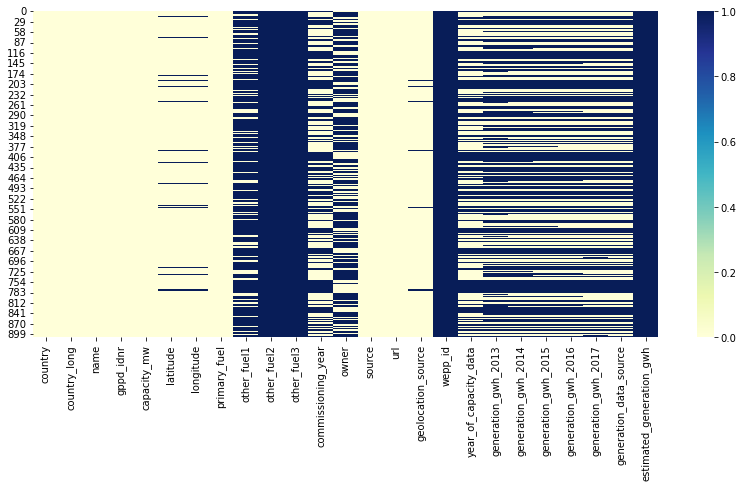

In [8]:
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(),cmap="YlGnBu")

Before fill the null values ahead lets dropping the columns we dont needed:

In [9]:
df = df.drop('country', axis =1)
df = df.drop('country_long', axis =1)
df = df.drop('other_fuel2', axis = 1) #above 80% missing values
df = df.drop('other_fuel3', axis = 1) #above 80% missing values
df = df.drop('other_fuel1', axis = 1) #above 80# missing values
df = df.drop('wepp_id', axis =1)
df = df.drop('estimated_generation_gwh', axis =1)
df = df.drop('url', axis = 1)
df = df.drop('geolocation_source', axis=1)

Let's treatment missing values

In [10]:
#Lets replace missing value for numeric columns
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean(), inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(), inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(), inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(), inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(), inplace=True)

In [11]:
#Replacing the Nan values with the median

df["commissioning_year"]=df["commissioning_year"].fillna(np.mean(df["commissioning_year"]))
df["latitude"]=df["latitude"].fillna(np.mean(df["latitude"]))
df["longitude"]=df["longitude"].fillna(np.mean(df["longitude"]))

In [13]:
df.nunique()

name                      908
gppd_idnr                 908
capacity_mw               365
latitude                  838
longitude                 829
primary_fuel                8
commissioning_year         74
owner                     280
source                    191
year_of_capacity_data       1
generation_gwh_2013       365
generation_gwh_2014       375
generation_gwh_2015       399
generation_gwh_2016       406
generation_gwh_2017       411
generation_data_source      1
dtype: int64

from above description we are getting one unique values which is year_of_capacity_data and generation_data_source in our data set. we need to drom these columns

In [14]:
#one unique value present thatsy drop these two columns
df = df.drop('year_of_capacity_data', axis=1)
df = df.drop('generation_data_source', axis=1)

In [15]:
nom_col=[]
for i in df:
    if df.dtypes[i] == object:
        nom_col.append(i)
        
print(nom_col)

['name', 'gppd_idnr', 'primary_fuel', 'owner', 'source']


above is the list of all columns datatypes as objects

# Lets do visualization:

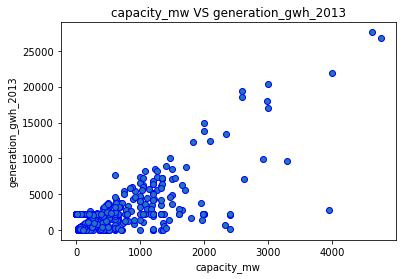

In [17]:
# the plot between capacity_mw vs generation_gwh_2013
plt.scatter(df['capacity_mw'], df['generation_gwh_2013'],edgecolor="blue")
plt.title('capacity_mw VS generation_gwh_2013')
plt.xlabel('capacity_mw')
plt.ylabel('generation_gwh_2013')
plt.show()

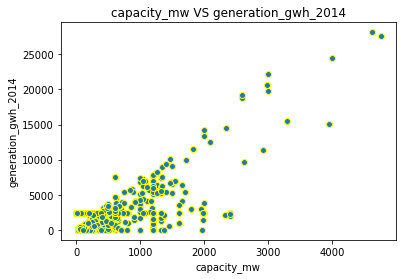

In [20]:
# the plot between capacity_mw vs generation_gwh_2014
plt.scatter(df['capacity_mw'], df['generation_gwh_2014'],edgecolor="yellow")
plt.title('capacity_mw VS generation_gwh_2014')
plt.xlabel('capacity_mw')
plt.ylabel('generation_gwh_2014')
plt.show()

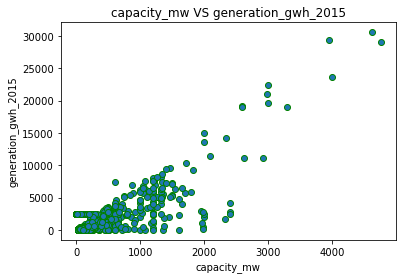

In [21]:
# the plot between capacity_mw vs generation_gwh_2015
plt.scatter(df['capacity_mw'], df['generation_gwh_2015'],edgecolor="green")
plt.title('capacity_mw VS generation_gwh_2015')
plt.xlabel('capacity_mw')
plt.ylabel('generation_gwh_2015')
plt.show()

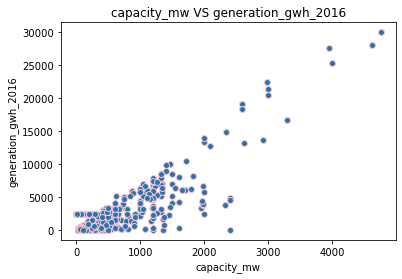

In [22]:
# the plot between capacity_mw vs generation_gwh_2016
plt.scatter(df['capacity_mw'], df['generation_gwh_2016'],edgecolor="pink")
plt.title('capacity_mw VS generation_gwh_2016')
plt.xlabel('capacity_mw')
plt.ylabel('generation_gwh_2016')
plt.show()

# Let's do Encoding:

In [23]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

variables = ['name', 'gppd_idnr', 'primary_fuel', 'owner', 'source']
for v in variables:
    df[v] = label.fit_transform(df[v])

In [24]:
df

name  gppd_idnr  capacity_mw  latitude  longitude  primary_fuel  \
0       0        658          2.5   28.1839    73.2407             6   
1       1        520         98.0   24.7663    74.6090             1   
2       2        854         39.2   21.9038    69.3732             7   
3       3          0        135.0   23.8712    91.3602             2   
4       4          1       1800.0   21.9603    82.4091             1   
..    ...        ...          ...       ...        ...           ...   
903   903        494       1600.0   16.2949    77.3568             1   
904   904        823          3.0   12.8932    78.1654             6   
905   905        892         25.5   15.2758    75.5811             7   
906   906        540         80.0   24.3500    73.7477             1   
907   907        877         16.5    9.9344    77.4768             7   

     commissioning_year  owner  source  generation_gwh_2013  \
0           2011.000000    229     109          2304.059202   
1           1996.876894    258     174          2304.059202   
2           1996.876894      2      21          2304.059202   
3           2004.000000    280      22           631.777928   
4           2015.000000    280      22          1668.290000   
..                  ...    ...     ...                  ...   
903         2016.000000    280      22          2304.059202   
904         1996.876894    114      77          2304.059202   
905         1996.876894    280      21          2304.059202   
906         1996.876894     91      59          2304.059202   
907         1996.876894    279      21          2304.059202   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            2420.393316          2414.072373          2453.936292   
1            2420.393316          2414.072373          2453.936292   
2            2420.393316          2414.072373          2453.936292   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
903          2420.393316             0.994875           233.596650   
904          2420.393316          2414.072373          2453.936292   
905          2420.393316          2414.072373          2453.936292   
906          2420.393316          2414.072373          2453.936292   
907          2420.393316          2414.072373          2453.936292   

     generation_gwh_2017  
0            2531.754458  
1            2531.754458  
2            2531.754458  
3             663.774500  
4            5385.579736  
..                   ...  
903           865.400000  
904          2531.754458  
905          2531.754458  
906          2531.754458  
907          2531.754458  

[908 rows x 14 columns]

there are not any categorical data types

# Let's Describe our datasets:

In [26]:
df.describe()

name  gppd_idnr  capacity_mw    latitude   longitude  \
count  908.00000  908.00000   908.000000  908.000000  908.000000   
mean   453.50000  453.50000   321.046378   21.196189   77.447848   
std    262.26132  262.26132   580.221767    6.088110    4.781201   
min      0.00000    0.00000     0.000000    8.168900   68.644700   
25%    226.75000  226.75000    16.837500   17.057825   74.390250   
50%    453.50000  453.50000    60.000000   21.278850   76.978950   
75%    680.25000  680.25000   388.125000   25.183775   79.211600   
max    907.00000  907.00000  4760.000000   34.649000   95.408000   

       primary_fuel  commissioning_year       owner      source  \
count    908.000000          908.000000  908.000000  908.000000   
mean       3.205947         1996.876894  227.534141   43.823789   
std        2.281339           12.994825   83.895877   44.624092   
min        0.000000         1927.000000    0.000000    0.000000   
25%        1.000000         1996.876894  188.750000   22.000000   
50%        3.000000         1996.876894  280.000000   22.000000   
75%        6.000000         2003.000000  280.000000   29.250000   
max        7.000000         2018.000000  280.000000  190.000000   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
count           908.000000           908.000000           908.000000   
mean           2304.059202          2420.393316          2414.072373   
std            2465.930970          2665.360236          2860.146282   
min               0.000000             0.000000             0.000000   
25%            1332.538825          1175.264825           874.205000   
50%            2304.059202          2420.393316          2414.072373   
75%            2304.059202          2420.393316          2414.072373   
max           27586.200000         28127.000000         30539.000000   

       generation_gwh_2016  generation_gwh_2017  
count           908.000000           908.000000  
mean           2453.936292          2531.754458  
std            2878.730064          2923.041411  
min               0.000000             0.000000  
25%             826.629750           852.438887  
50%            2453.936292          2531.754458  
75%            2453.936292          2531.754458  
max           30015.000000         35116.000000

there is a large difference between 75% and maximum for some columns.so outliers are present in this dataset.lets see its with visualization.

<AxesSubplot:>

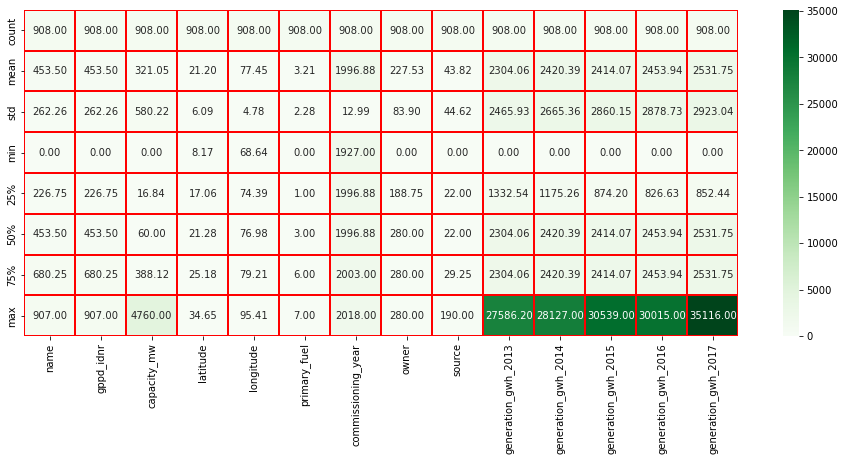

In [25]:
plt.figure(figsize=(16,6))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f",cmap="Greens")

# correleation of the columns with the target columns:

In [27]:
df.corr()

name  gppd_idnr  capacity_mw  latitude  longitude  \
name                 1.000000   0.336792     0.059870 -0.133707   0.018649   
gppd_idnr            0.336792   1.000000    -0.334308 -0.105932  -0.380290   
capacity_mw          0.059870  -0.334308     1.000000  0.049790   0.197124   
latitude            -0.133707  -0.105932     0.049790  1.000000   0.031501   
longitude            0.018649  -0.380290     0.197124  0.031501   1.000000   
primary_fuel         0.038752   0.607373    -0.377783 -0.013453  -0.348710   
commissioning_year  -0.041884   0.041601     0.265827  0.095050   0.086054   
owner                0.116715  -0.602108     0.303672  0.007033   0.277888   
source              -0.013801   0.416575    -0.241701  0.055943  -0.239008   
generation_gwh_2013  0.082699   0.044187     0.667842  0.036639   0.014021   
generation_gwh_2014  0.084915   0.045391     0.705434  0.044085   0.011669   
generation_gwh_2015  0.075140   0.039965     0.722081  0.036127   0.019176   
generation_gwh_2016  0.067800   0.027947     0.752829  0.030932   0.039758   
generation_gwh_2017  0.075262   0.024079     0.767040  0.030655   0.040407   

                     primary_fuel  commissioning_year         owner  \
name                     0.038752           -0.041884  1.167146e-01   
gppd_idnr                0.607373            0.041601 -6.021076e-01   
capacity_mw             -0.377783            0.265827  3.036718e-01   
latitude                -0.013453            0.095050  7.033301e-03   
longitude               -0.348710            0.086054  2.778876e-01   
primary_fuel             1.000000           -0.123060 -2.601736e-01   
commissioning_year      -0.123060            1.000000 -2.166954e-02   
owner                   -0.260174           -0.021670  1.000000e+00   
source                   0.053609            0.021832 -2.438403e-01   
generation_gwh_2013     -0.120512            0.110848  1.506199e-16   
generation_gwh_2014     -0.125000            0.134305 -1.018477e-16   
generation_gwh_2015     -0.125138            0.149304  1.267618e-16   
generation_gwh_2016     -0.131358            0.172698  9.361248e-17   
generation_gwh_2017     -0.132174            0.173400  1.751317e-16   

                           source  generation_gwh_2013  generation_gwh_2014  \
name                -1.380057e-02         8.269905e-02         8.491457e-02   
gppd_idnr            4.165747e-01         4.418679e-02         4.539080e-02   
capacity_mw         -2.417009e-01         6.678419e-01         7.054341e-01   
latitude             5.594280e-02         3.663949e-02         4.408464e-02   
longitude           -2.390075e-01         1.402097e-02         1.166872e-02   
primary_fuel         5.360860e-02        -1.205116e-01        -1.249997e-01   
commissioning_year   2.183213e-02         1.108482e-01         1.343054e-01   
owner               -2.438403e-01         1.506199e-16        -1.018477e-16   
source               1.000000e+00         3.108486e-17         3.524754e-17   
generation_gwh_2013  3.108486e-17         1.000000e+00         9.634535e-01   
generation_gwh_2014  3.524754e-17         9.634535e-01         1.000000e+00   
generation_gwh_2015 -8.212982e-18         8.963761e-01         9.537116e-01   
generation_gwh_2016 -5.204877e-17         8.735420e-01         9.260100e-01   
generation_gwh_2017 -1.050936e-16         8.306385e-01         8.918721e-01   

                     generation_gwh_2015  generation_gwh_2016  \
name                        7.514018e-02         6.780015e-02   
gppd_idnr                   3.996483e-02         2.794672e-02   
capacity_mw                 7.220814e-01         7.528288e-01   
latitude                    3.612730e-02         3.093239e-02   
longitude                   1.917647e-02         3.975774e-02   
primary_fuel               -1.251376e-01        -1.313584e-01   
commissioning_year          1.493040e-01         1.726976e-01   
owner                       1.267618e-16         9.361248e-17   
source           

lets see its with visualization

<AxesSubplot:>

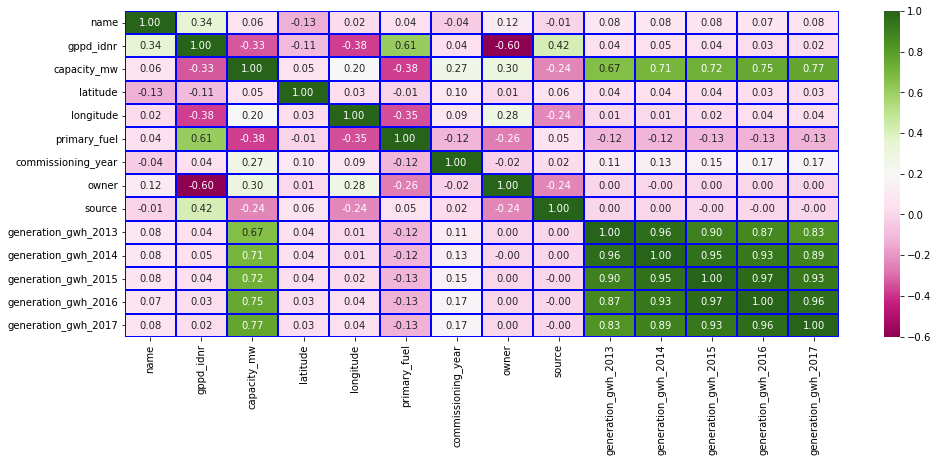

In [28]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="blue",fmt="0.2f",cmap="PiYG")

Checking the columns which are positively and negative correlated with the target columns:

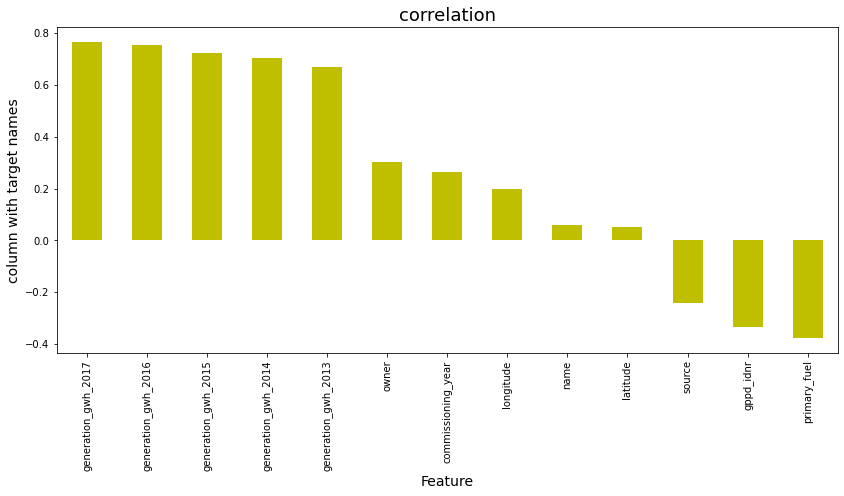

In [31]:
plt.figure(figsize=(14,6))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

here we can see that maximum columns are positive correlation with the target columns

<Figure size 432x288 with 0 Axes>

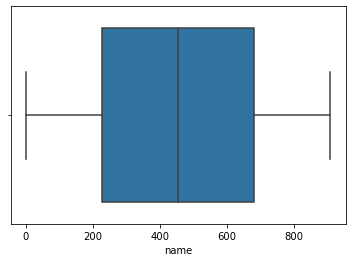

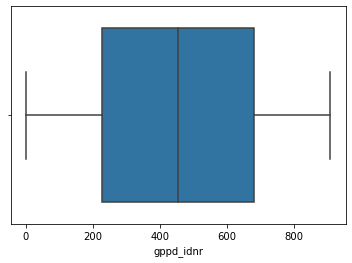

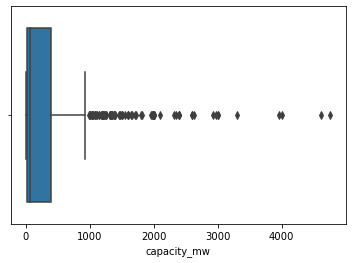

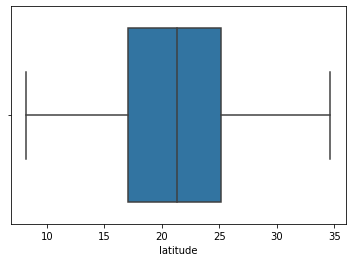

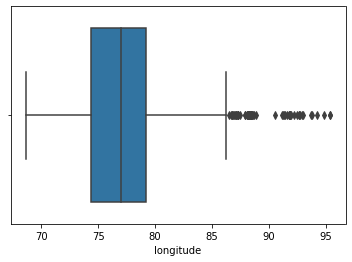

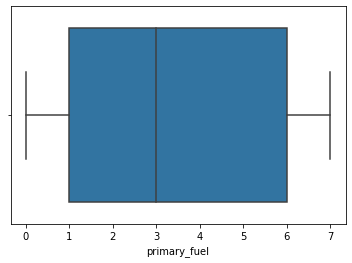

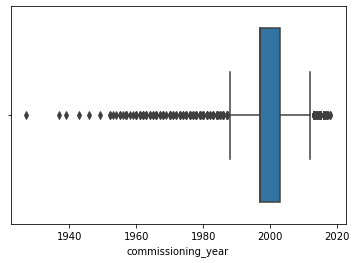

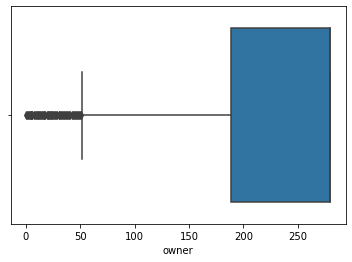

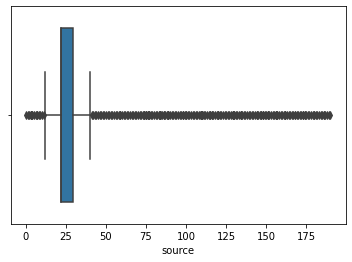

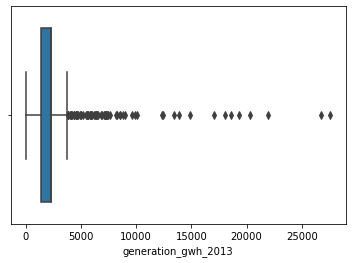

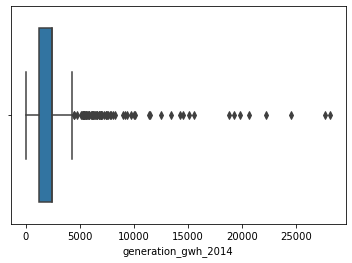

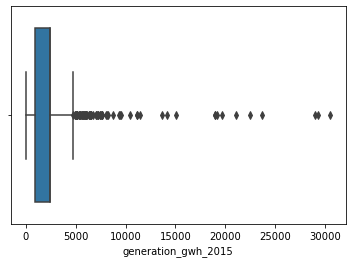

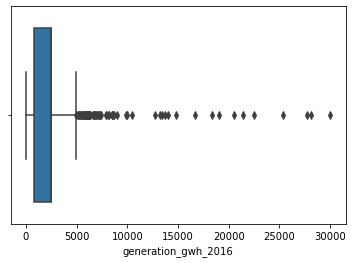

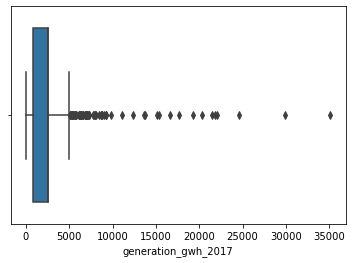

In [32]:
plt.figure()
for i in df.columns:
    plt.figure()
    sns.boxplot(x=df[i])

outliers present in our datasets.

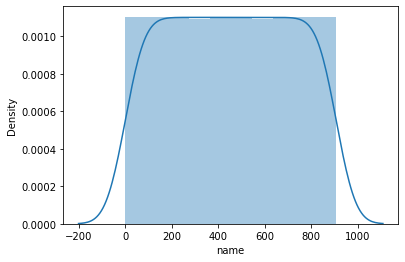

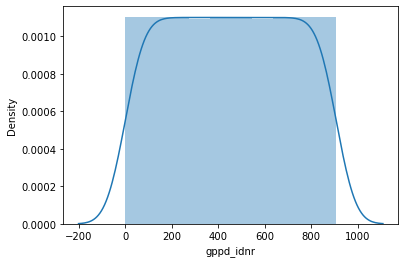

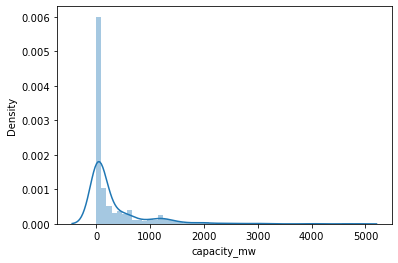

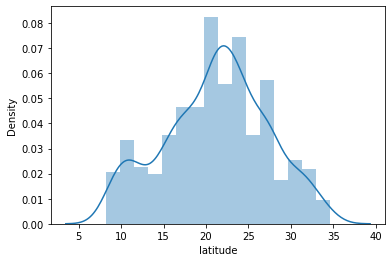

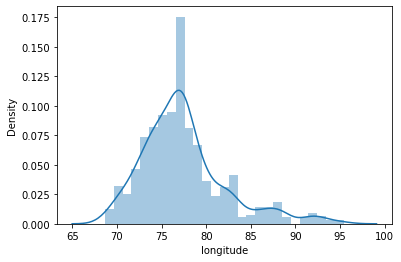

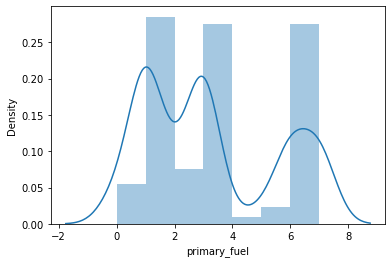

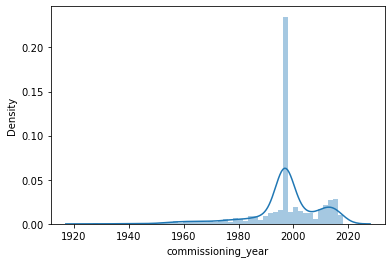

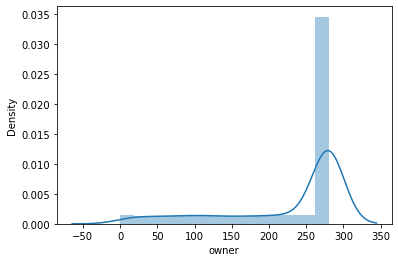

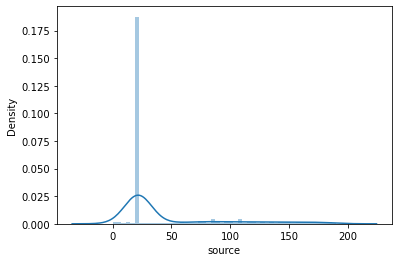

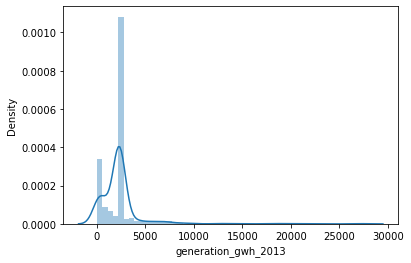

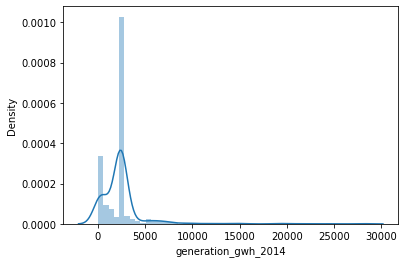

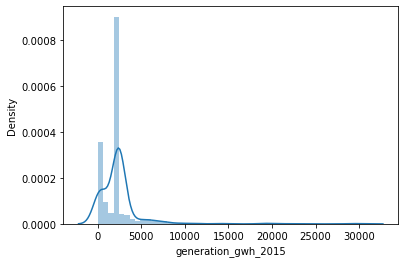

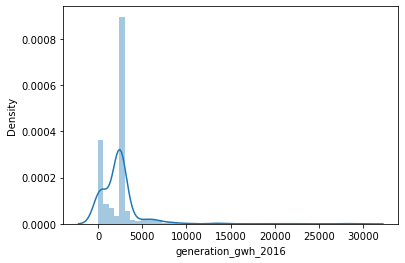

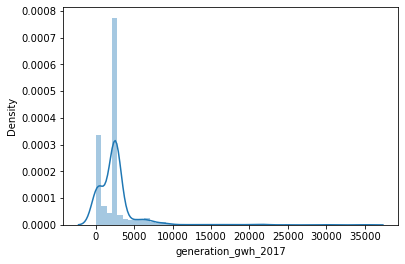

In [33]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i],kde=True)

We can see distribution is uneven in some columns

In [34]:
df.skew()

name                   0.000000
gppd_idnr              0.000000
capacity_mw            3.193257
latitude              -0.147391
longitude              1.129836
primary_fuel           0.471141
commissioning_year    -1.383330
owner                 -1.375607
source                 1.829145
generation_gwh_2013    5.241491
generation_gwh_2014    5.041961
generation_gwh_2015    5.367370
generation_gwh_2016    5.071758
generation_gwh_2017    5.111938
dtype: float64

All the values of skewness are in range of -0.5 to +0.5 .remove skewness those columns

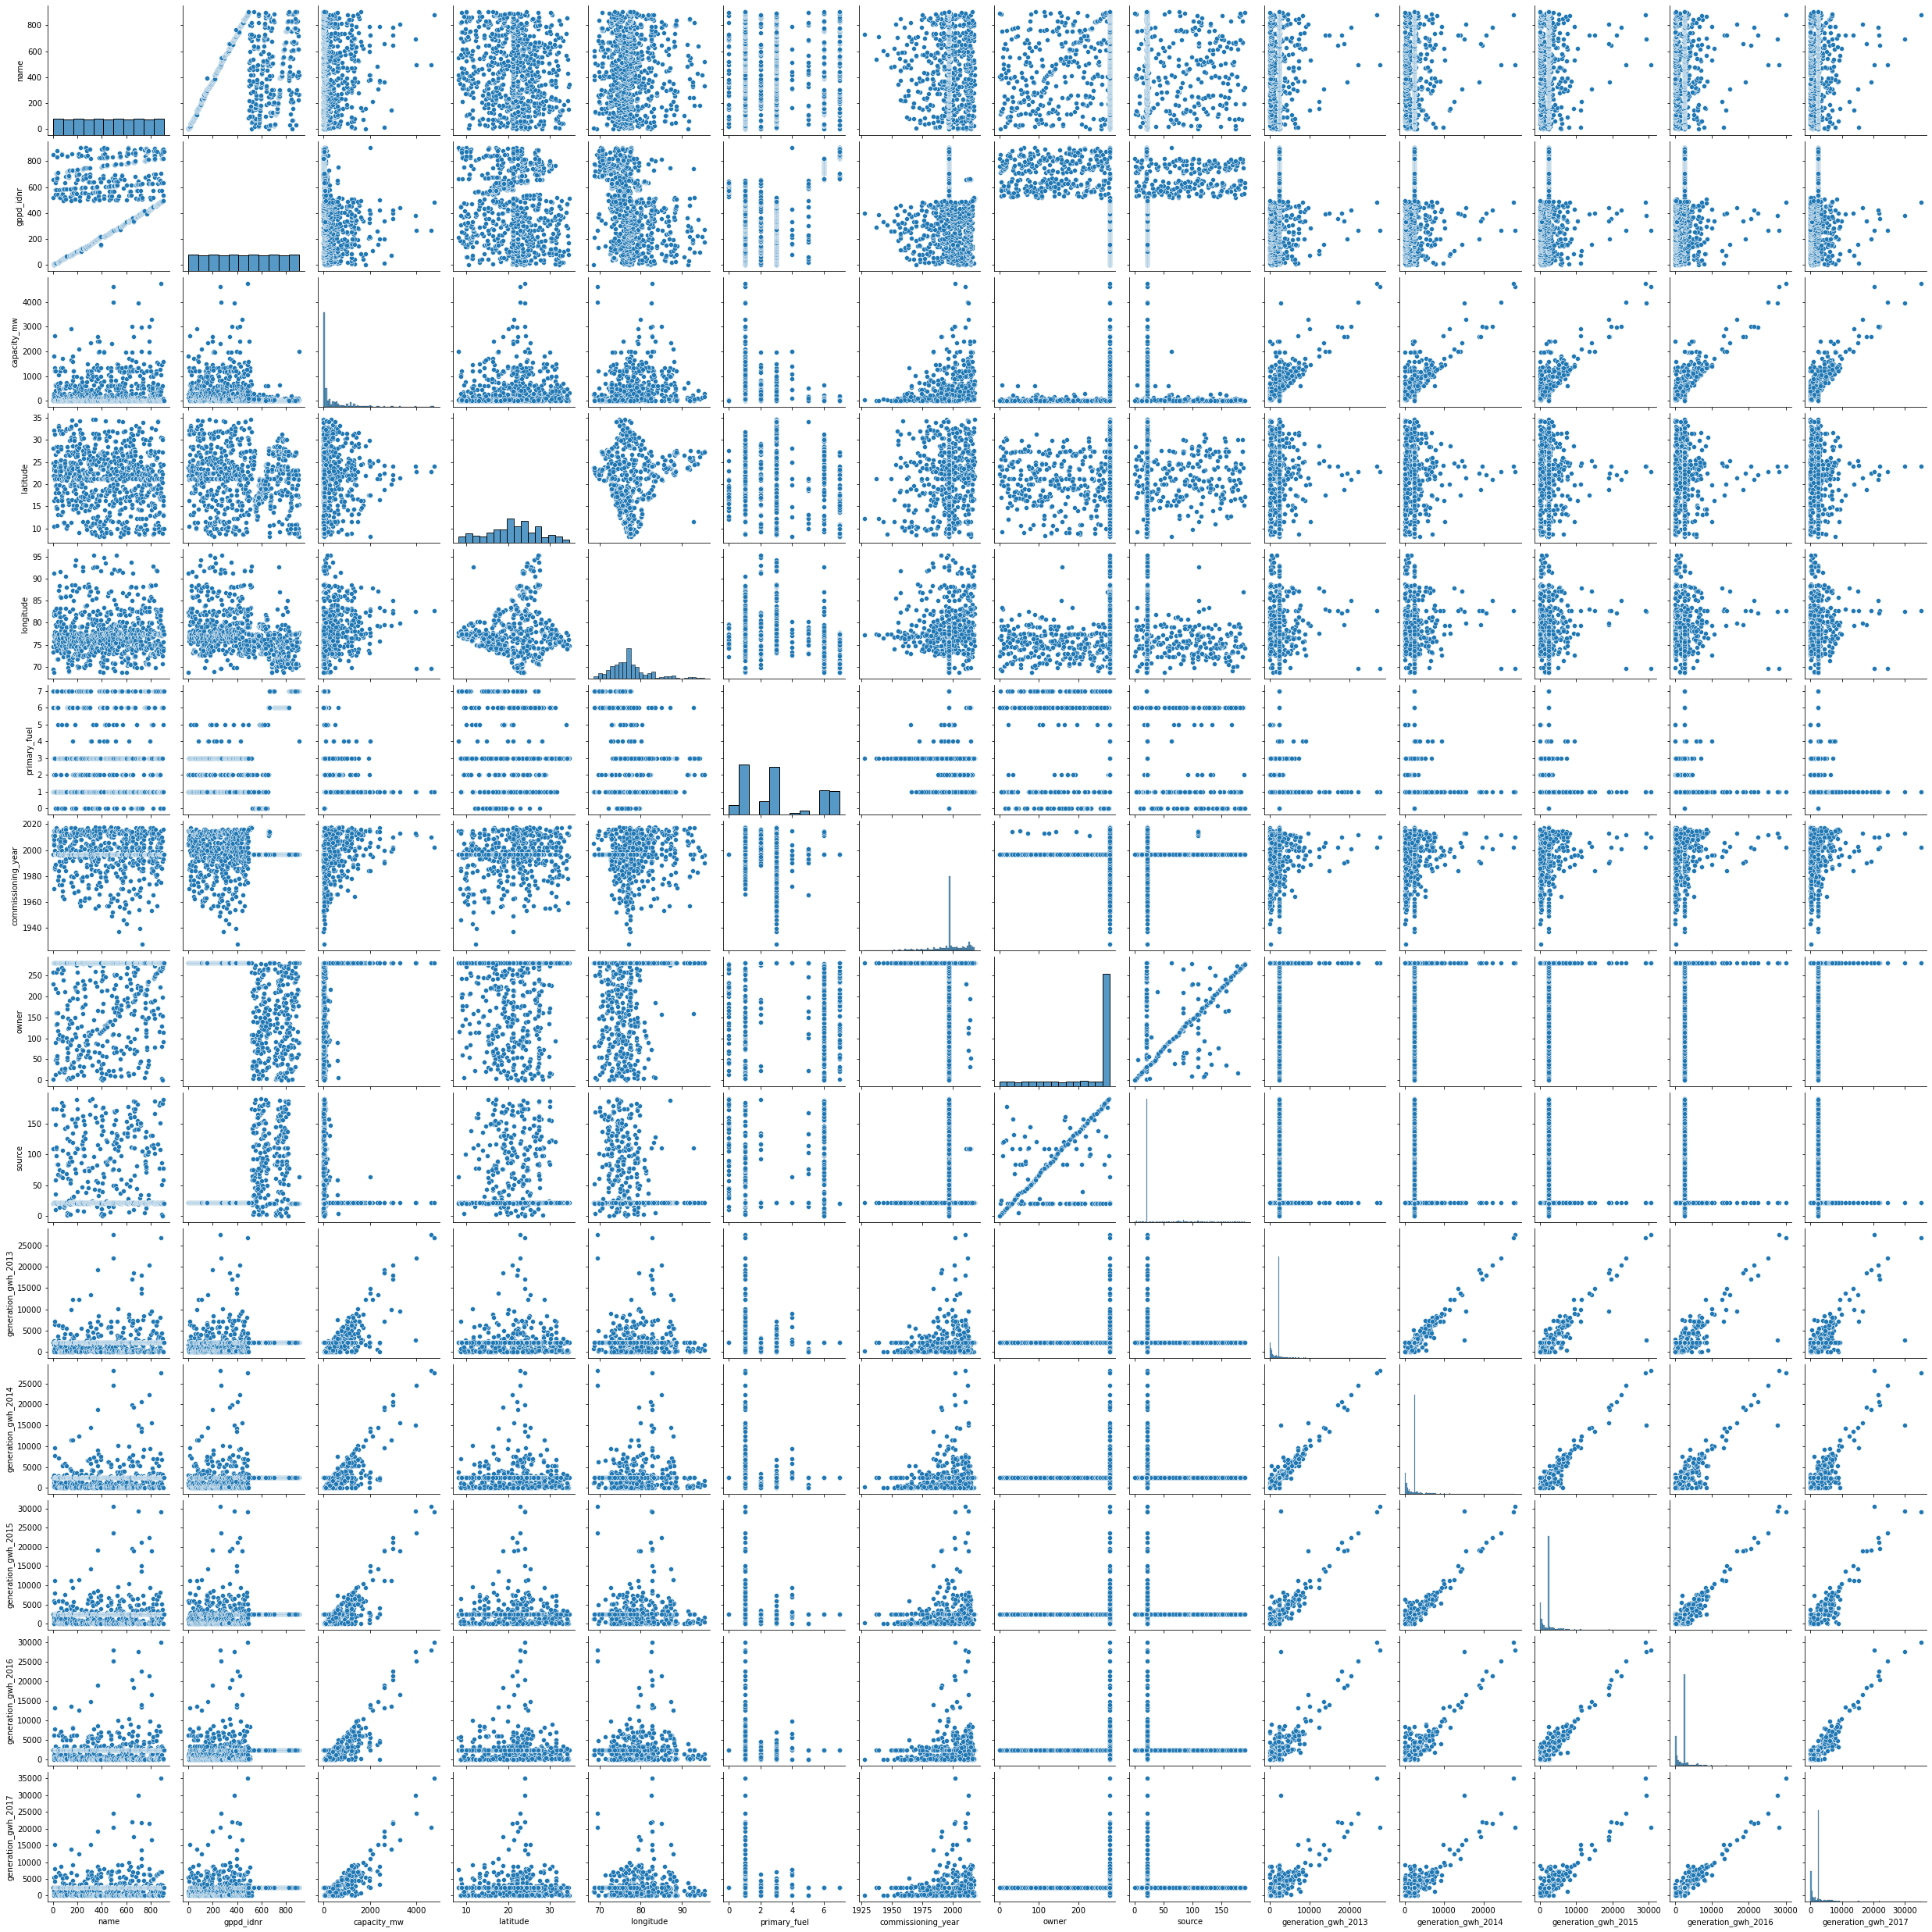

In [35]:
sns.pairplot(df)

here we can see that all dataset are lies in your nature

# outliers and Skewness removal:

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 15,  15,  15,  15,  72,  81, 144, 144, 144, 144, 144, 144, 159,
        159, 180, 184, 192, 210, 210, 210, 210, 210, 210, 222, 240, 245,
        300, 309, 309, 309, 309, 309, 309, 322, 324, 334, 341, 343, 346,
        361, 364, 365, 365, 365, 365, 365, 365, 372, 376, 389, 417, 428,
        445, 455, 479, 483, 485, 494, 494, 494, 494, 494, 494, 495, 495,
        495, 495, 495, 495, 500, 520, 530, 533, 539, 542, 547, 575, 584,
        602, 622, 639, 649, 649, 649, 649, 649, 649, 658, 658, 658, 658,
        658, 658, 662, 670, 690, 696, 696, 696, 696, 696, 707, 710, 722,
        722, 722, 722, 725, 725, 725, 725, 725, 727, 727, 727, 727, 727,
        727, 729, 787, 787, 787, 787, 787, 787, 789, 808, 809, 809, 809,
        809, 809, 819, 833, 848, 849, 849, 871, 872, 880, 881, 881, 881,
        881, 881, 881, 896, 901], dtype=int64),
 array([ 2, 11, 12, 13,  8,  8,  2,  9, 10, 11, 12, 13,  9, 10,  4,  4,  8,
         2,  9, 10, 11, 12, 13,  6,  4,  4,  8,  2,  9, 10, 11, 12, 13,  

In [37]:
df_new=df[(z<3).all(axis=1)]
df_new

name  gppd_idnr  capacity_mw  latitude  longitude  primary_fuel  \
0       0        658          2.5   28.1839    73.2407             6   
1       1        520         98.0   24.7663    74.6090             1   
2       2        854         39.2   21.9038    69.3732             7   
3       3          0        135.0   23.8712    91.3602             2   
4       4          1       1800.0   21.9603    82.4091             1   
..    ...        ...          ...       ...        ...           ...   
903   903        494       1600.0   16.2949    77.3568             1   
904   904        823          3.0   12.8932    78.1654             6   
905   905        892         25.5   15.2758    75.5811             7   
906   906        540         80.0   24.3500    73.7477             1   
907   907        877         16.5    9.9344    77.4768             7   

     commissioning_year  owner  source  generation_gwh_2013  \
0           2011.000000    229     109          2304.059202   
1           1996.876894    258     174          2304.059202   
2           1996.876894      2      21          2304.059202   
3           2004.000000    280      22           631.777928   
4           2015.000000    280      22          1668.290000   
..                  ...    ...     ...                  ...   
903         2016.000000    280      22          2304.059202   
904         1996.876894    114      77          2304.059202   
905         1996.876894    280      21          2304.059202   
906         1996.876894     91      59          2304.059202   
907         1996.876894    279      21          2304.059202   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            2420.393316          2414.072373          2453.936292   
1            2420.393316          2414.072373          2453.936292   
2            2420.393316          2414.072373          2453.936292   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
903          2420.393316             0.994875           233.596650   
904          2420.393316          2414.072373          2453.936292   
905          2420.393316          2414.072373          2453.936292   
906          2420.393316          2414.072373          2453.936292   
907          2420.393316          2414.072373          2453.936292   

     generation_gwh_2017  
0            2531.754458  
1            2531.754458  
2            2531.754458  
3             663.774500  
4            5385.579736  
..                   ...  
903           865.400000  
904          2531.754458  
905          2531.754458  
906          2531.754458  
907          2531.754458  

[835 rows x 14 columns]

now remove all outliers

In [38]:
df_new.shape

(835, 14)

In [39]:
df.shape

(908, 14)

In [40]:
data_loss=((908-835)/908)*100
data_loss

8.039647577092511

data loss percentage is 8.03 

In [41]:
x=df_new.drop("capacity_mw",axis=1)
y=df_new["capacity_mw"]
print(x.shape)
print(y.shape)

(835, 13)
(835,)


separating features columns which is denoting x and target columns(y)

In [42]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [43]:
df_new.skew()

name                  -0.287353
gppd_idnr             -0.316273
latitude              -0.071773
longitude             -0.000633
primary_fuel          -0.057065
commissioning_year     0.026831
owner                 -0.945983
source                -0.179941
generation_gwh_2013   -0.179013
generation_gwh_2014   -0.259255
generation_gwh_2015   -0.325673
generation_gwh_2016   -0.322983
generation_gwh_2017   -0.350358
dtype: float64

skewness has been reduce.

# Let's perform standardization:

In [44]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
m.fit_transform(df_new)

array([[0.        , 0.79043467, 0.74960358, ..., 0.45548893, 0.46644538,
        0.49104366],
       [0.00563934, 0.66505618, 0.61851367, ..., 0.45548893, 0.46644538,
        0.49104366],
       [0.01042758, 0.95686259, 0.50949732, ..., 0.45548893, 0.46644538,
        0.49104366],
       ...,
       [0.99846636, 0.98786252, 0.26033639, ..., 0.45548893, 0.46644538,
        0.49104366],
       [0.99923331, 0.68374099, 0.60261283, ..., 0.45548893, 0.46644538,
        0.49104366],
       [1.        , 0.97566943, 0.06382432, ..., 0.45548893, 0.46644538,
        0.49104366]])

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [46]:
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    Ln=LinearRegression()
    Ln.fit(x_train,y_train)
    pred=Ln.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is ",maxAcc, " at Random State ",maxRS)

Best accuracy is  0.7330226918266525  at Random State  180


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [48]:
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor()]
for m in model:
    m.fit(x_train,y_train)
    #sc=m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(y_test,predm)
    print('Accuracy Score of',m,'is:',acc)
    print('mean_absolute_error:',mean_absolute_error(y_test,predm))
    print('mean_squared_error:',mean_squared_error(y_test,predm))
    print('Root mean_squared_error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("\n")

Accuracy Score of LinearRegression() is: 0.7330226918266525
mean_absolute_error: 164.2452506653311
mean_squared_error: 49608.71798668362
Root mean_squared_error: 222.7301461111262


Accuracy Score of DecisionTreeRegressor() is: 0.7235939201530501
mean_absolute_error: 125.74664670658684
mean_squared_error: 51360.73683097006
Root mean_squared_error: 226.62907322532575


Accuracy Score of RandomForestRegressor() is: 0.8760467236514395
mean_absolute_error: 91.4549174251497
mean_squared_error: 23032.531011619027
Root mean_squared_error: 151.7647225530987


Accuracy Score of AdaBoostRegressor() is: 0.6741549032774344
mean_absolute_error: 217.16426222804841
mean_squared_error: 60547.308762876884
Root mean_squared_error: 246.06362746833773




Lets check cross validation for finest accuracy

# Cross Validation Model:

In [50]:
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print("Score for",m,"is: ",score.mean())

Score for LinearRegression() is:  0.5965269791491532
Score for DecisionTreeRegressor() is:  0.6114569343774691
Score for RandomForestRegressor() is:  0.7739068819100463
Score for AdaBoostRegressor() is:  0.5486240207220854


With RandomForestRegressor model there is very less difference in accuracy and cross validation score, Hence the best model is RandomForestRegressor.

# Hyper Parameter Training:

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
parameters={"n_estimators":[100,200,300],
           "criterion":["squared_error", "absolute_error","poisson"],
           "max_depth":[1,2,3],
           "min_samples_split":[1,2,3]}

In [54]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [55]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [1, 2, 3], 'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 200, 300]})

In [56]:
GCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'min_samples_split': 3,
 'n_estimators': 200}

In [57]:
Final_mod= RandomForestRegressor(criterion="squared_error",max_depth=3,min_samples_split=3,n_estimators=200)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
r2=r2_score(y_test,pred)
print(r2*100)

84.01635361956605


After performing GridSearchCV method accuarcy is 84.01%

# saving the best model:

In [58]:
import pickle
filename= 'global_power_plant_regression_prediction.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))

# Conclusion:

In [59]:
#load the model from the disk

loaded_model = pickle.load(open('global_power_plant_regression_prediction.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8401635361956605


In [60]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Orginal"])
conclusion

0           1           2            3           4    \
Predicted  44.650707  188.054315  424.041518  1222.711458  358.769212   
Orginal    44.650707  188.054315  424.041518  1222.711458  358.769212   

                  5          6          7          8          9    ...  \
Predicted  285.442352  44.851686  333.56369  44.851686  44.225109  ...   
Orginal    285.442352  44.851686  333.56369  44.851686  44.225109  ...   

                  157        158        159         160         161  \
Predicted  190.646615  44.225109  44.225109  659.345622  188.054315   
Orginal    190.646615  44.225109  44.225109  659.345622  188.054315   

                 162        163        164         165         166  
Predicted  44.225109  44.851686  345.66472  930.500866  188.054315  
Orginal    44.225109  44.851686  345.66472  930.500866  188.054315  

[2 rows x 167 columns]

In [61]:
#end